<a href="https://colab.research.google.com/github/bethdfuller/MSDA/blob/main/D208/D208_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D208: Task 2: Logistic Regression Modeling

### Beth Fuller

### June 2024

# Part I: Research Question

**A1: Question**

Can we predict which customers will churn?

**A2: Goals**  

Successfully predicting which customers are more likely to churn would be beneficial for the telecommunications company, as it would enable them to make more informed decisions to retain customers and lower the churn rate.   

# Part II: Method Justification

**B1: Assumptions of Logistic Regression Model**
* **Multicollinearity** - the independent variables should not be highly correlated with each other.
* **Independence** - the observations are both independent and random.
* **Binary outcome** - the dependent variable (y) is binary there are two outcomes. The results from this logistic regression will be 1. customer churns or 2. customer does not churn.  
* **No outliers** - outliers can distort the outcome of the model.

**B2: Benefits of Python**
* Familiarity - Python is the language in which I am the most familiar and proficient.
* Versatile - Python is a versatile language, offering a broad array of libraries that can be used to develop various models and perform analyses appropriate for the logistic regression model for the telecommunications company.  

**B3: Logistic Regression**

The question for this analysis is - Can we predict which customers will churn? Since there are only two possible answers (Yes customer will churn / No customer will not churn) it is an ideal question for a logistic regression model which is a machine learning algorithm that accomplishes binary classification by estimating the probability of an event occurring. The logistic regression model here is used to make a prediction about a categorical variable (Churn) using one or more independent variables.

# Part III: Data Preparation

**C1: Data Cleaning Goals / Steps**

The initial data inspection showed 10,000 records and 50 attributes. The data will be cleaned via the following steps:
* **Drop** - columns that are unnecessary for the logistic regression model.
* **Missing values** - check for and address missing values (i.e. delete, input).
  * .isnull.sum()
* **Duplicate values** - check for and address duplicate values (i.e remove).
  * .duplicated()
  * .duplicated().valuecounts()
* **Outliers** - check for and address outliers.
  * .describe()
  * .plot to create box plots
* **One Hot Encoding** - logistic regression requires numerical data so the categorical that does not have an ordinal relationship will be transformed via one hot encoding.
  * .get_dummies
  * drop_first=True - helps avoid multicollinearity

**C2: Dependent Variable / Independent Variables**

* **Dependent Variable:** Churn
  * Churn is a categorical variable.

* **Independent Variables:**
  * Continuous Independent Variables:
    * Children
    * Age
    * Income
    * Outage_sec_perweek
    * Email
    * Contacts
    * Yearly_equip_failure
    * Tenure
    * Monthly Charge
    * Bandwidth GB Year
  * Categorical Independent Variables:
    * Area
    * Marital
    * Gender
    * Internet Service
    * PaymentMethod
  * Boolean Categorical Independent Variables:
    * Techie
    * Contract
    * Port_modem
    * Tablet
    * Phone
    * Multiple
    * OnlineSecurity
    * OnlineBackup
    * DeviceProtection
    * TechSupport
    * StreamingTV
    * StreamingMovies
    * PaperlessBilling

The numeric column summary statistics show the count of observations, the mean (average of the data), the standard deviation of the observations (a measure of the spread of the data in relation to the mean), the maximum and minimum of the values, and the 25%, 50% (middle value), and 75% quartile range which help to understand the spread of the data from the mean.

The categorical column summary statistics show the count of observations, the number of unique (distinct) categories, the top (most frequent) category and the frequency which is the frequency of the top category.

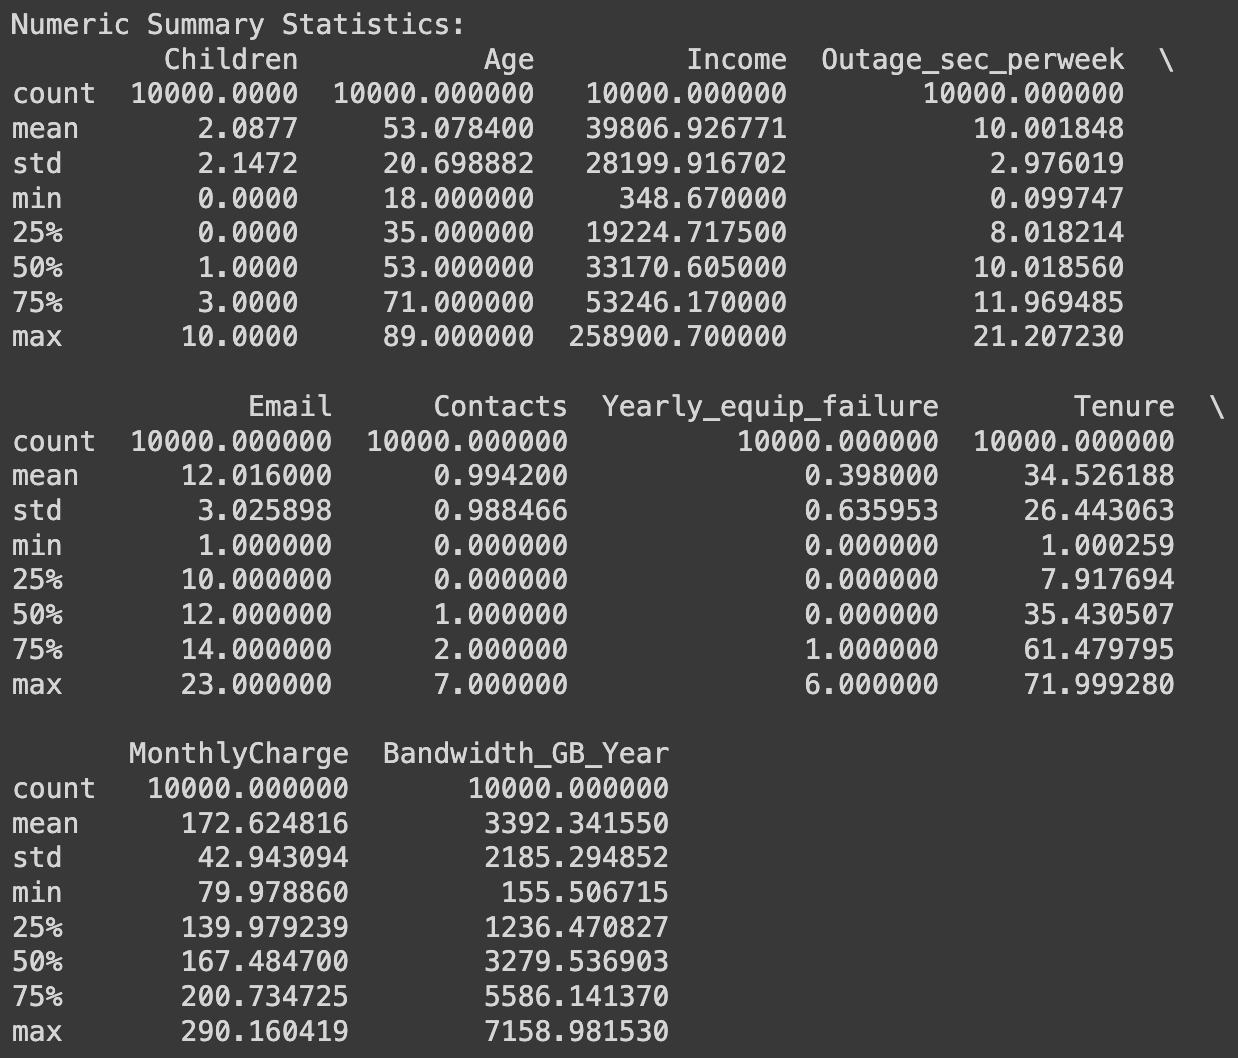
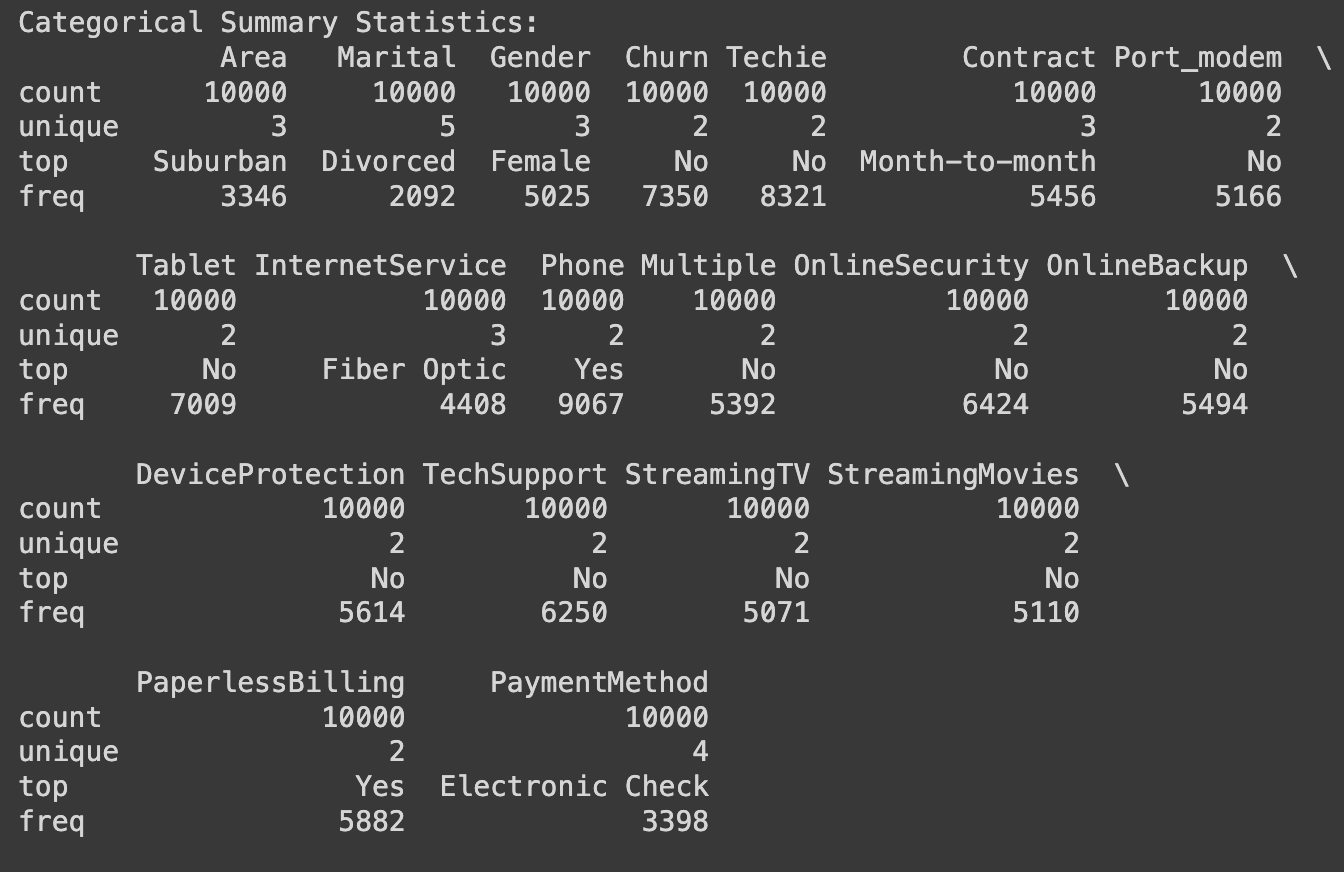

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn import metrics

# Display maximum columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 60)

# URL to churn data set
url = 'https://raw.githubusercontent.com/bethdfuller/MSDA/main/D208/churn_clean.csv'

# Read churn data set / use keep_default_na to correctly read InternetService value of None
churndf = pd.read_csv(url, keep_default_na=False)

In [ ]:
# Data frame info
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [ ]:
churndf.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


## C1: Drop Columns

In [ ]:
# Columns to drop
drop_columns = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
                'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
                'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7',
                'Item8']

# Drop columns

churndf.drop(columns=drop_columns, inplace=True)

churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Marital               10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Churn                 10000 non-null  object 
 7   Outage_sec_perweek    10000 non-null  float64
 8   Email                 10000 non-null  int64  
 9   Contacts              10000 non-null  int64  
 10  Yearly_equip_failure  10000 non-null  int64  
 11  Techie                10000 non-null  object 
 12  Contract              10000 non-null  object 
 13  Port_modem            10000 non-null  object 
 14  Tablet                10000 non-null  object 
 15  InternetService     

## C1: Missing Values

In [ ]:
churndf.isnull().sum()

Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

## C1: Duplicates

In [ ]:
churndf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
print(churndf.duplicated().value_counts())

False    10000
Name: count, dtype: int64


## C1: Outliers

In [ ]:
# Statistics for selected variables

churndf.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


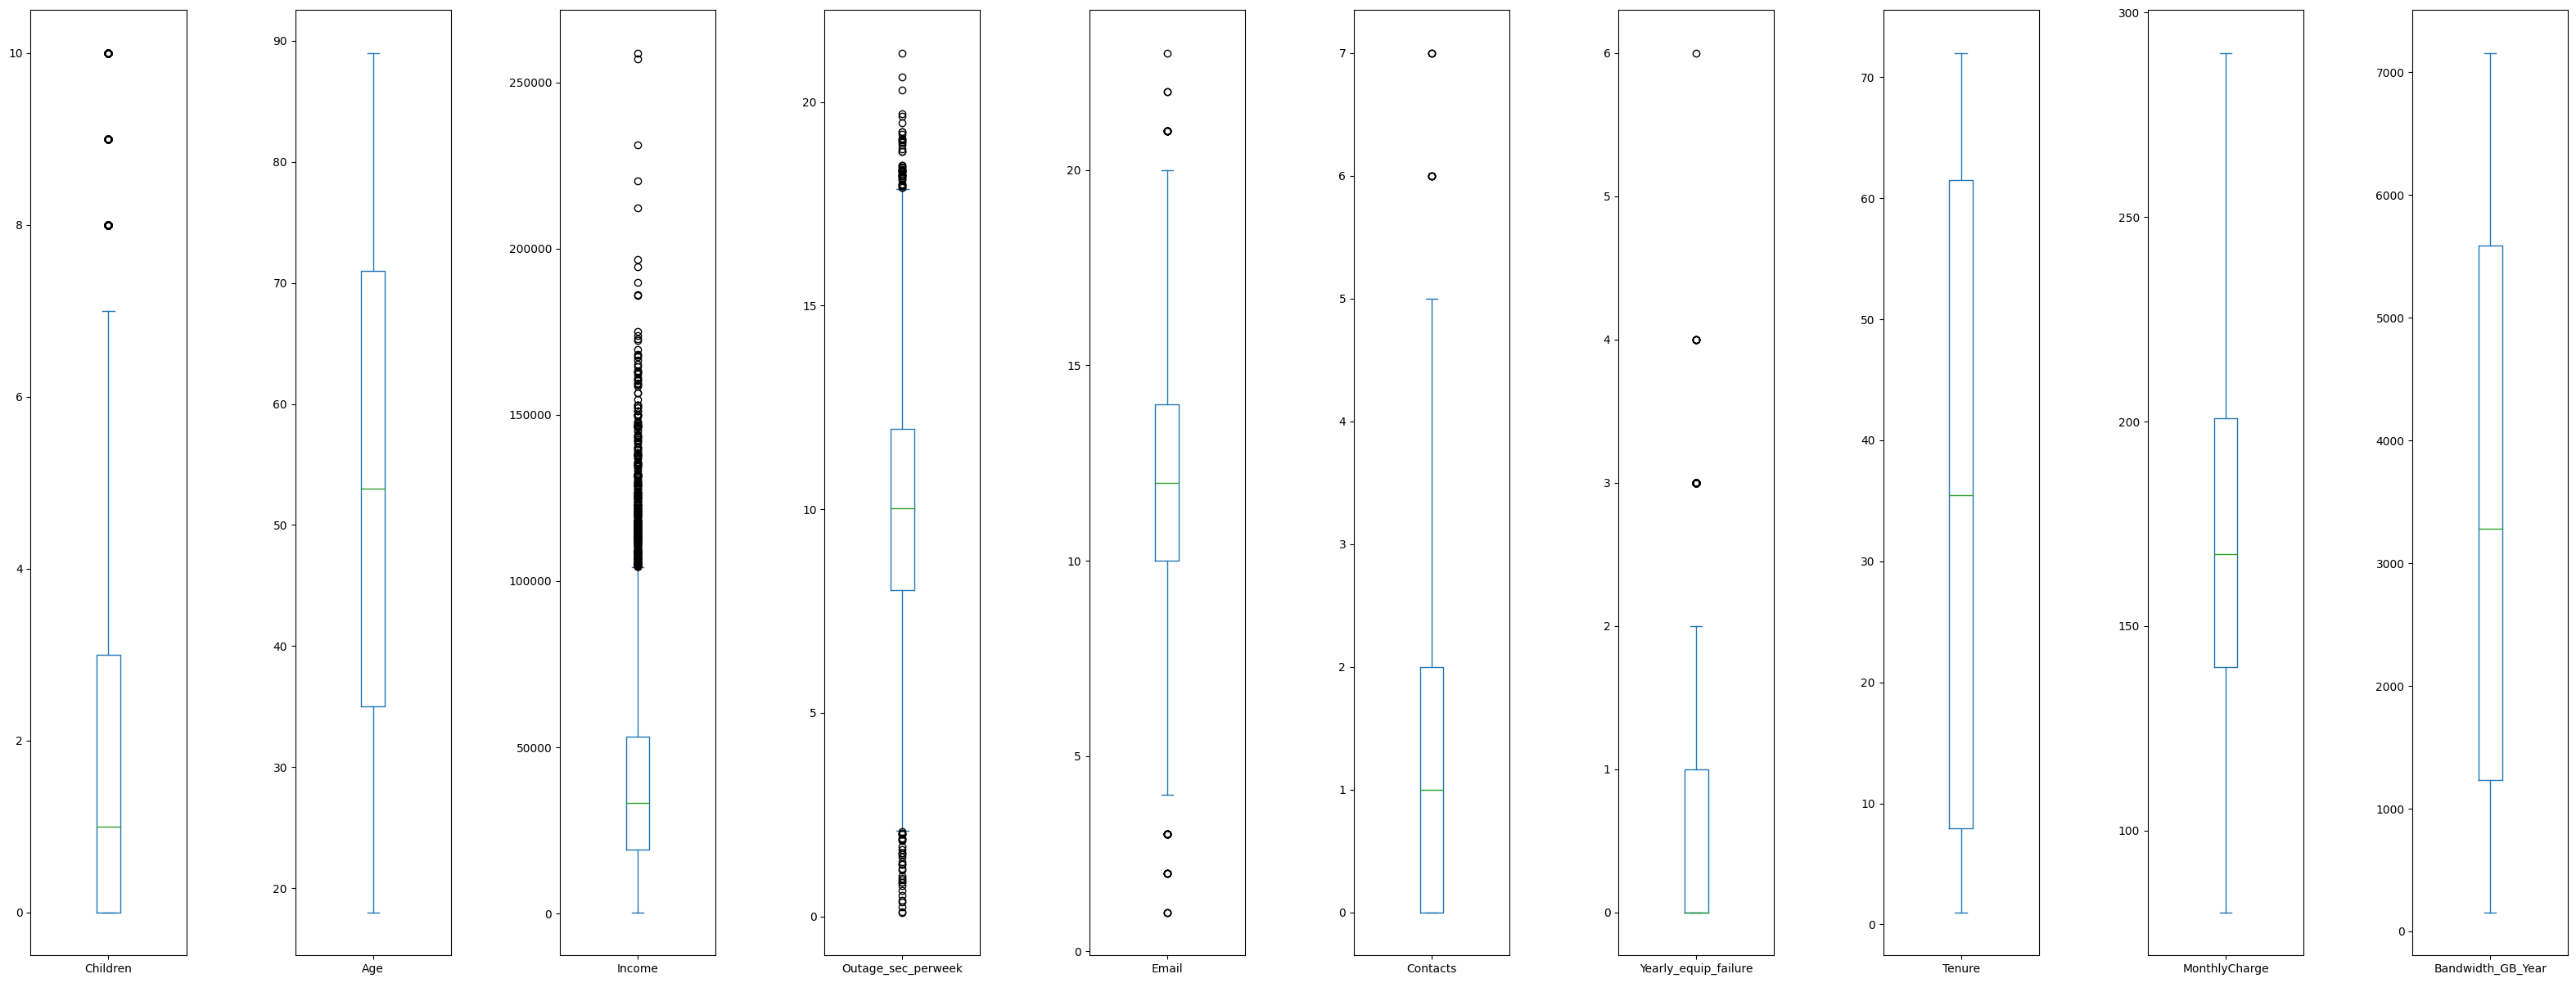

In [ ]:
# Boxplots to view variable outliers

churndf.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(40, 15)
)

plt.subplots_adjust(wspace=0.7)
plt.show()

## C4: Data Transformation

In [ ]:
bool_var = ['Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

churndf_e = pd.get_dummies(churndf, columns=bool_var, drop_first=True)


print(churndf_e.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Marital               10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  InternetService       10000 non-null  object 
 11  PaymentMethod         10000 non-null  object 
 12  Tenure                10000 non-null  float64
 13  MonthlyCharge         10000 non-null  float64
 14  Bandwidth_GB_Year     10000 non-null  float64
 15  Churn_Yes           

In [ ]:
multiple_var = ['Area', 'Marital', 'Gender', 'InternetService', 'PaymentMethod']

churndf_initial = pd.get_dummies(churndf_e, columns=multiple_var, drop_first=True)

print(churndf_initial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Children                               10000 non-null  int64  
 1   Age                                    10000 non-null  int64  
 2   Income                                 10000 non-null  float64
 3   Outage_sec_perweek                     10000 non-null  float64
 4   Email                                  10000 non-null  int64  
 5   Contacts                               10000 non-null  int64  
 6   Yearly_equip_failure                   10000 non-null  int64  
 7   Tenure                                 10000 non-null  float64
 8   MonthlyCharge                          10000 non-null  float64
 9   Bandwidth_GB_Year                      10000 non-null  float64
 10  Churn_Yes                              10000 non-null  bool   
 11  Tec

In [ ]:
boolean_columns = [
    'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
    'Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes',
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
    'PaperlessBilling_Yes', 'Area_Suburban', 'Area_Urban',
    'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
    'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary',
    'InternetService_Fiber Optic', 'InternetService_None',
    'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
    'PaymentMethod_Mailed Check'
]

# Convert boolean columns to int
churndf_initial[boolean_columns] = churndf_initial[boolean_columns].astype(int)

# Display the first few rows of the updated DataFrame
print(churndf_initial.dtypes)


Children                                   int64
Age                                        int64
Income                                   float64
Outage_sec_perweek                       float64
Email                                      int64
Contacts                                   int64
Yearly_equip_failure                       int64
Tenure                                   float64
MonthlyCharge                            float64
Bandwidth_GB_Year                        float64
Churn_Yes                                  int64
Techie_Yes                                 int64
Contract_One year                          int64
Contract_Two Year                          int64
Port_modem_Yes                             int64
Tablet_Yes                                 int64
Phone_Yes                                  int64
Multiple_Yes                               int64
OnlineSecurity_Yes                         int64
OnlineBackup_Yes                           int64
DeviceProtection_Yes

## C2: Summary Statistics

In [ ]:
# Separate numeric and categorical columns
numeric_columns = churndf.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = churndf.select_dtypes(include=['object']).columns

# Numeric
numeric_summary = churndf[numeric_columns].describe()

# Categorical
categorical_summary = churndf[categorical_columns].describe()

print("\nNumeric Summary Statistics:")
print(numeric_summary)

print("\nCategorical Summary Statistics:")
print(categorical_summary)



Numeric Summary Statistics:
         Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email      Contacts  Yearly_equip_failure        Tenure  \
count  10000.000000  10000.000000          10000.000000  10000.000000   
mean      12.016000      0.994200              0.398000     34.526188   
std        3.025898      0.988466              0.635953     26.443063   
min        1.000000      0.000000              0

## C3: Univariate Visualizations

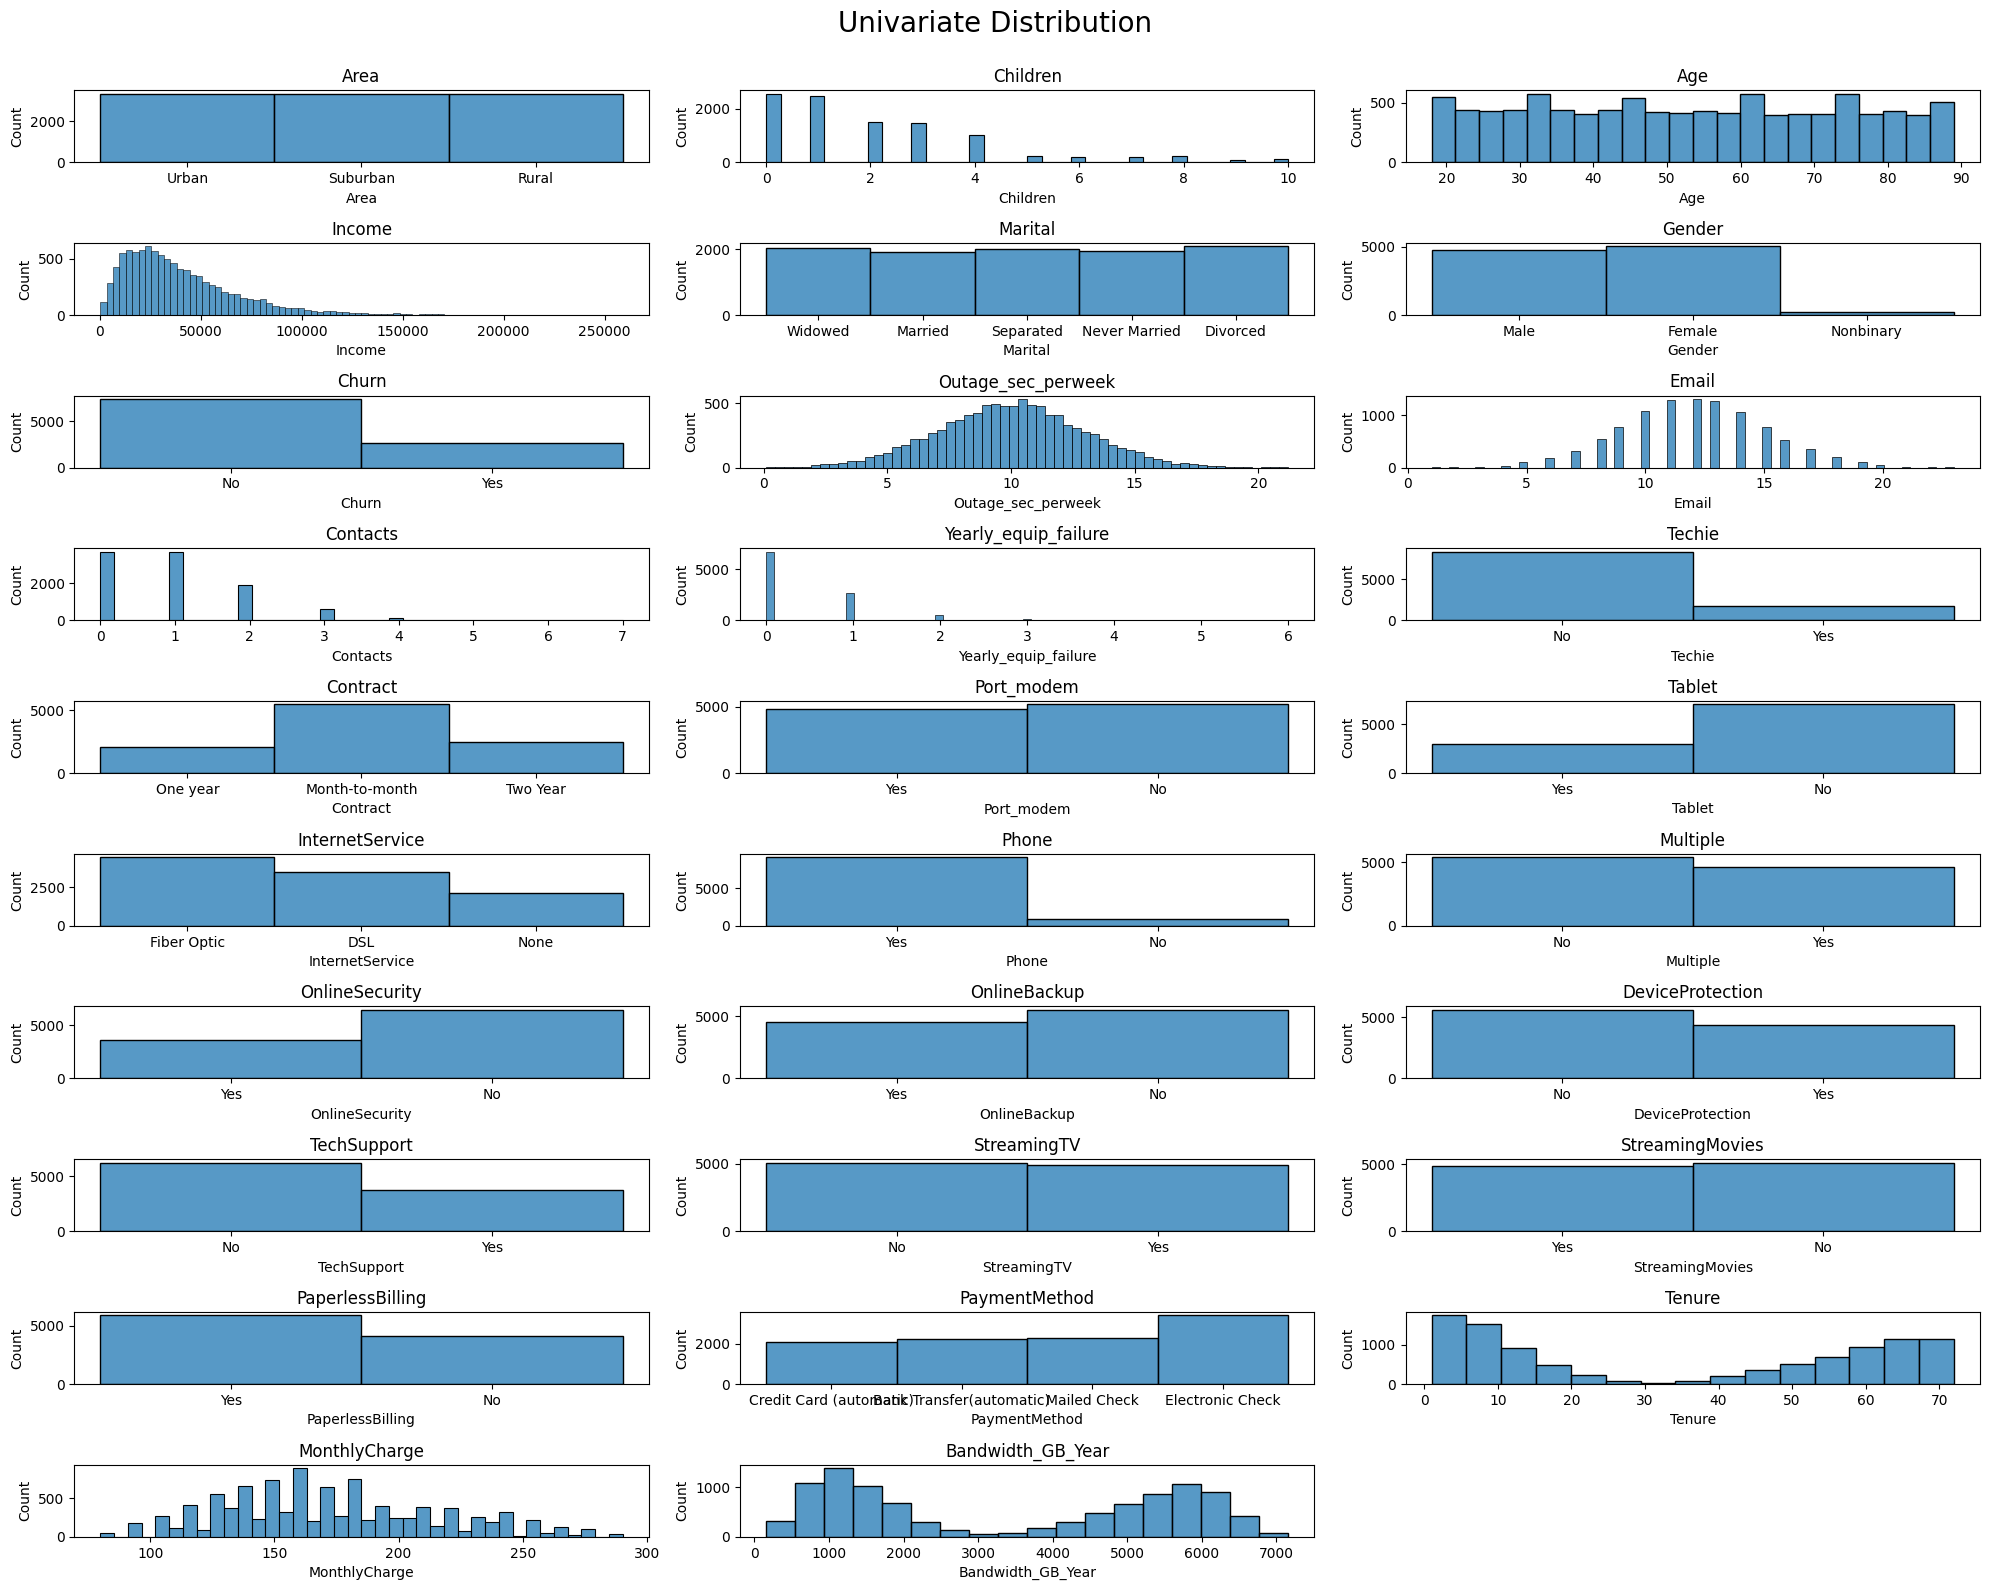

In [ ]:
fig_rows, fig_cols = 13, 3
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20,20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns in churndf
for i, col in enumerate(churndf.columns):
    if i >= fig_rows * fig_cols:
        break
    sns.histplot(data=churndf, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")

# Hide empty subplots
for j in range(i+1, fig_rows * fig_cols):
    fig.delaxes(axes[j])

plt.suptitle("Univariate Distribution", fontsize=20, y=1)
plt.tight_layout()

plt.show()


## C3: Bivariate Visualizations


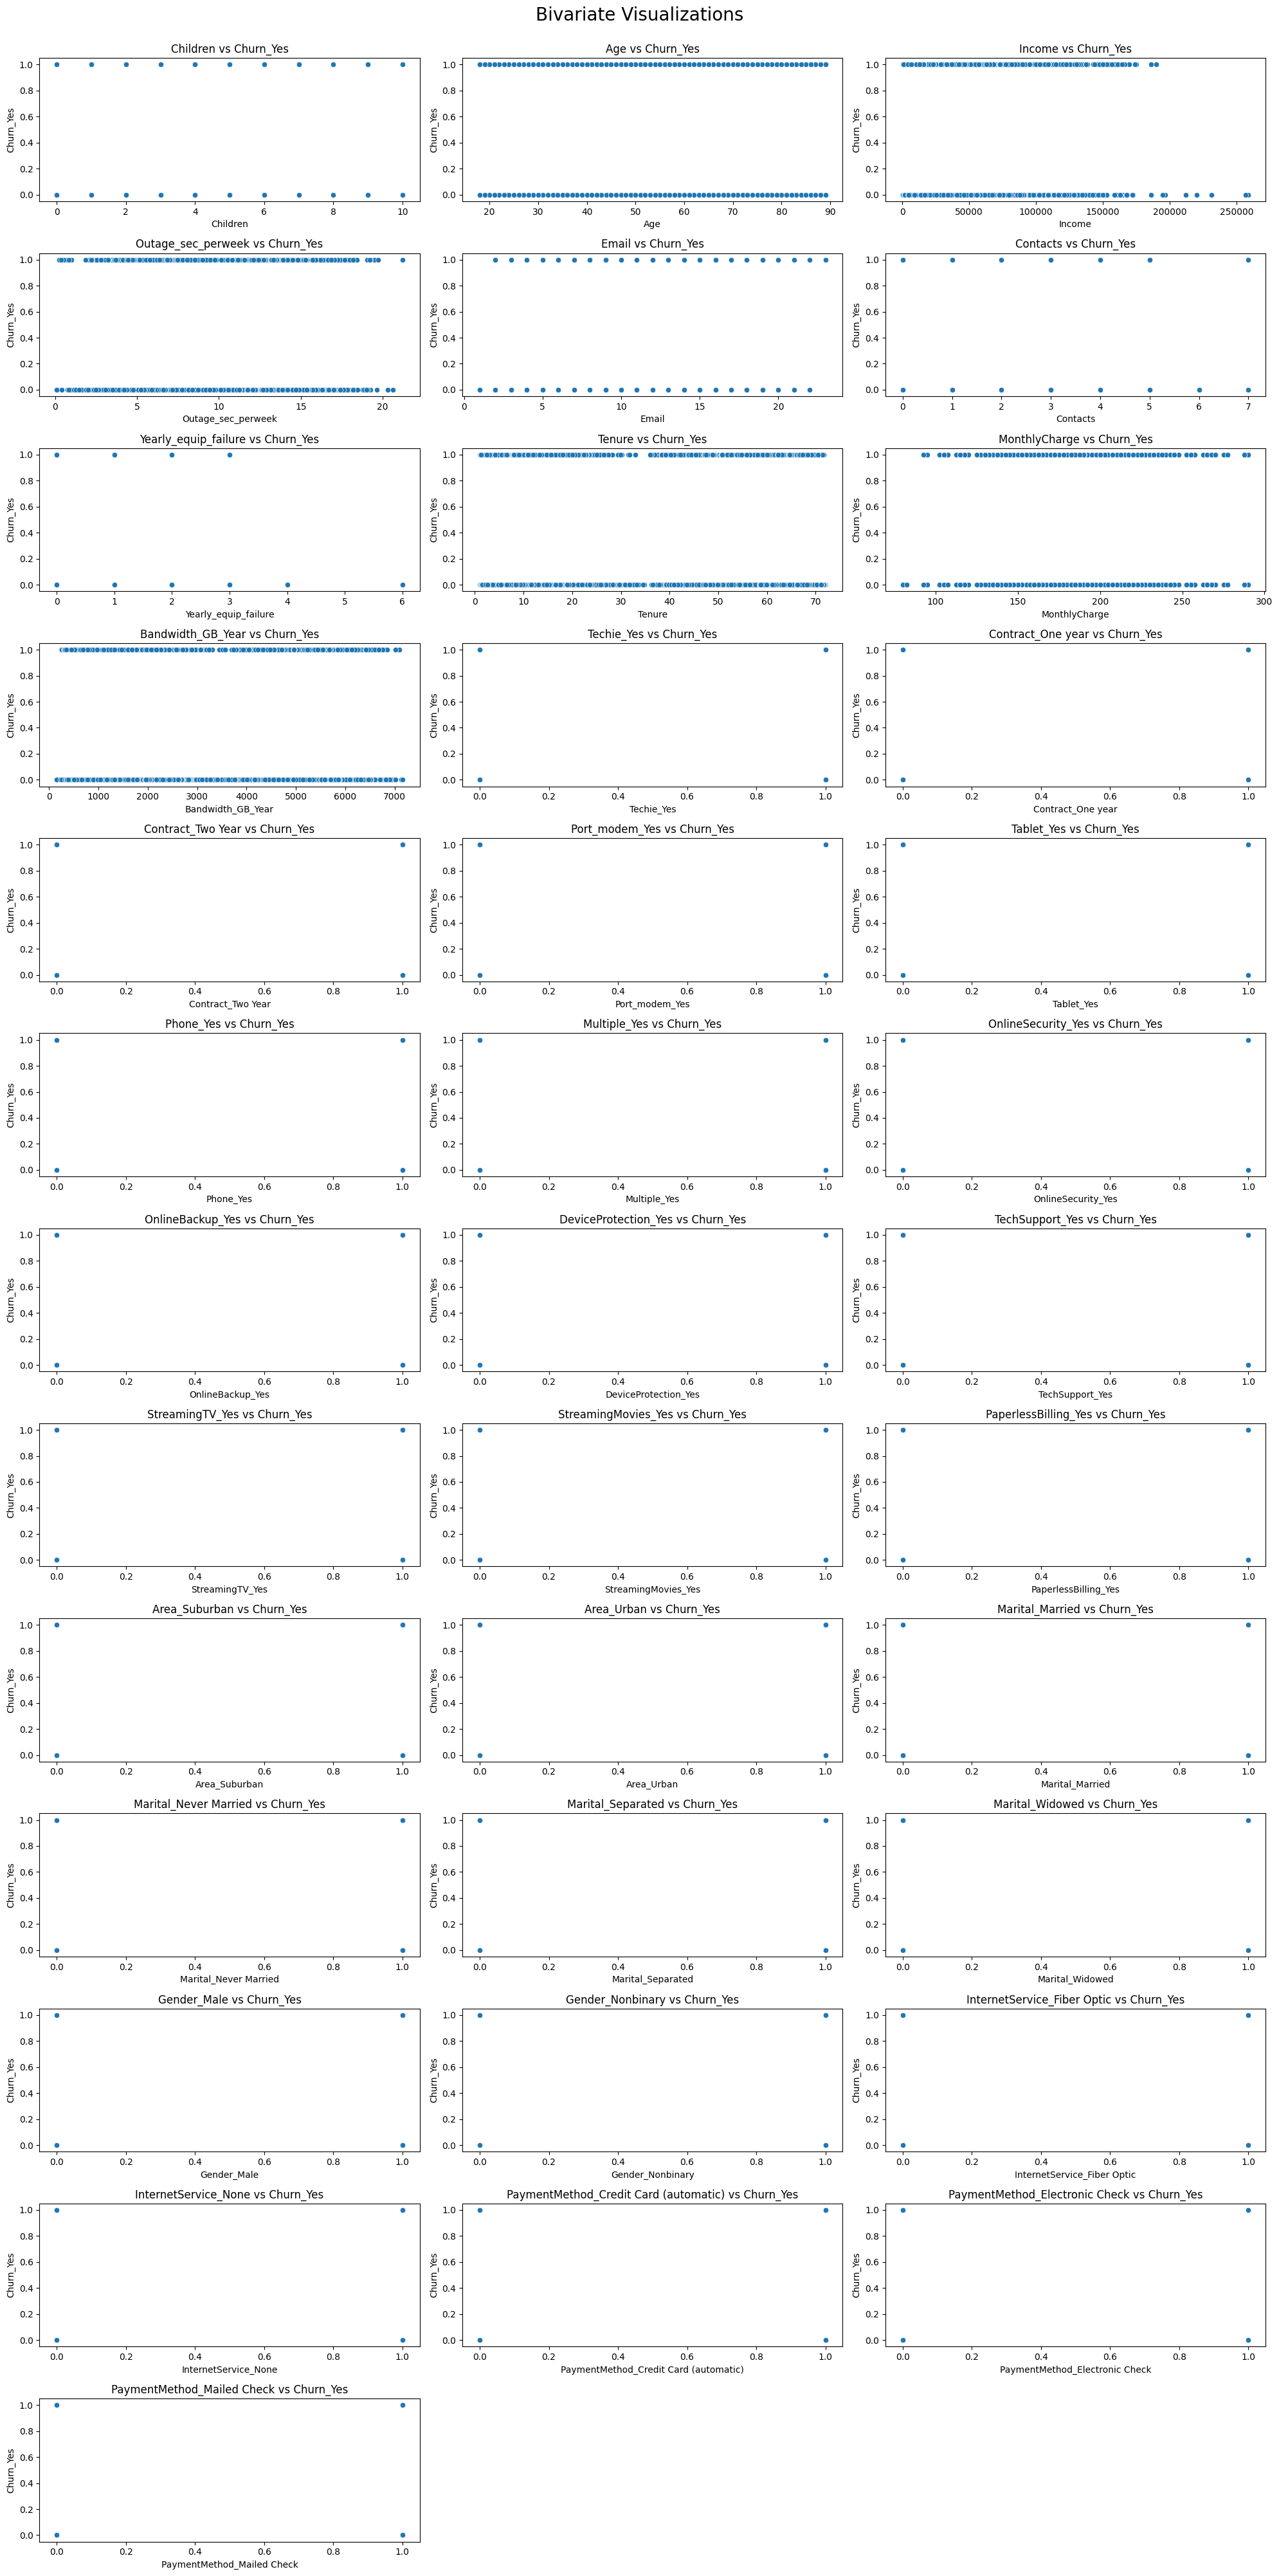

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify continuous and categorical variables
continuous_vars = churndf_initial.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = churndf_initial.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from the list of continuous variables
continuous_vars.remove('Churn_Yes')

# Number of rows and columns for subplots
fig_rows, fig_cols = 13, 3
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 40))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Continuous variables against Churn_Yes
for i, col in enumerate(continuous_vars):
    if i >= fig_rows * fig_cols:
        break
    sns.scatterplot(data=churndf_initial, x=col, y='Churn_Yes', ax=axes[i])
    axes[i].set_title(f"{col} vs Churn_Yes")

# Categorical variables against Churn_Yes
for j, col in enumerate(categorical_vars, start=len(continuous_vars)):
    if j >= fig_rows * fig_cols:
        break
    sns.scatterplot(data=churndf_initial, x=col, y='Churn_Yes', ax=axes[j])
    axes[j].set_title(f"{col} vs Churn_Yes")

# Remove empty plots
for k in range(len(continuous_vars) + len(categorical_vars), fig_rows * fig_cols):
    fig.delaxes(axes[k])

plt.suptitle("Bivariate Visualizations", fontsize=20, y=1)
plt.tight_layout()

plt.show()


## C5: Export CSV

In [ ]:
churndf_initial.to_csv('churndf_mls.csv', index=False)

# Part IV: Model Comparison and Analysis

## D1: Logistic Regression

Using scikit learn a logistic regression model was created with the goal of predicting the dependent variable, Churn using all the independent variables from C2. To build this model a DataCamp tutorial was followed (Data Camp 2024).

In [ ]:
# Define the dependent variable (y) & the independent variables (X)
y = churndf_initial['Churn_Yes']
X = churndf_initial.drop(columns=['Churn_Yes']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

logreg = LogisticRegression(random_state=7, max_iter=5000)

# Fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)

Confusion Matrix:
 [[1639  191]
 [ 267  403]]


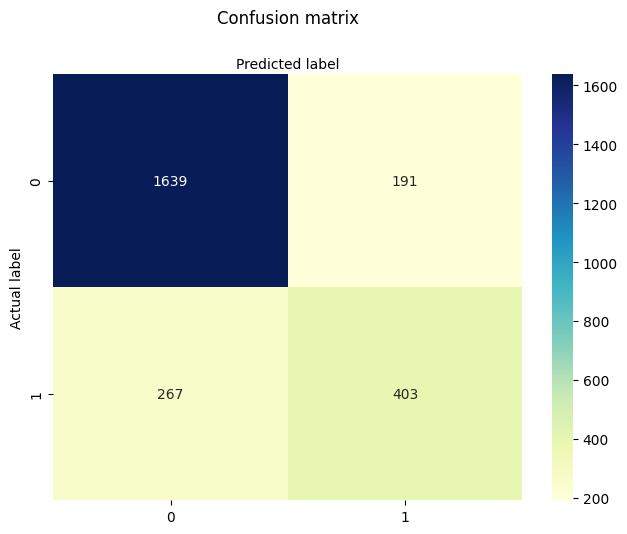

In [ ]:
class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
target_names = ['Churn Yes', 'Churn No']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Churn Yes       0.86      0.90      0.88      1830
    Churn No       0.68      0.60      0.64       670

    accuracy                           0.82      2500
   macro avg       0.77      0.75      0.76      2500
weighted avg       0.81      0.82      0.81      2500



## D2: Feature Selection / D3: Reduced Model

The logistic regression model will be refined using Recursive Feature Elimination (RFE) from the scikit-learn library. RFE works by recursively considering fewer features, removing the least important ones until the desired number of features is reached. To determine the optimal number of features to retain in the logistic regression model, I experimented by comparing the precision of models with varying numbers of features. I selected 10 features because the precision for Churn No remained consistent at approximately 60% (0.62 to be exact), and the precision for Churn Yes stayed at 81%. Choosing 10 features also provides the telecommunications company with several key areas to focus on to improve customer retention. Below is the chart from the aforementioned experimentation for reference.

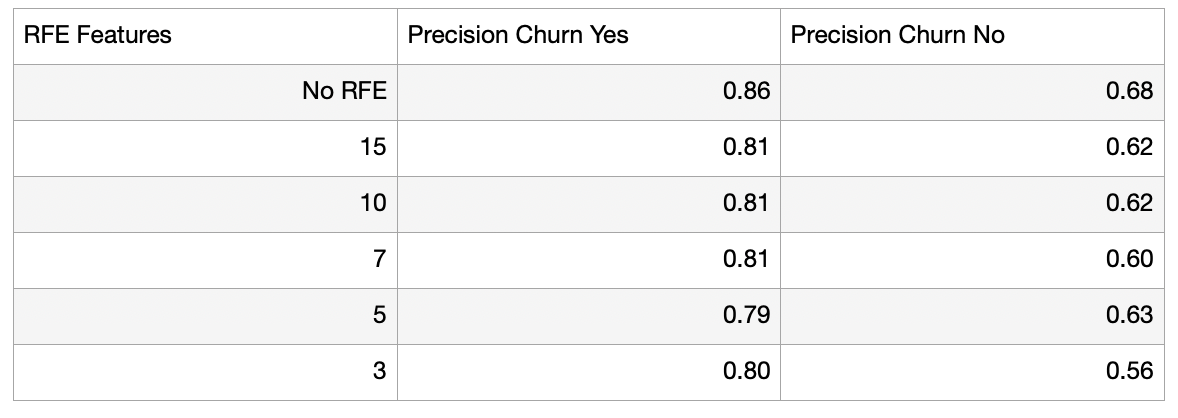

In [ ]:
# RFE / features to select
rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected features: ", selected_features)

# Fit the reduced model with the selected features
logreg.fit(X_train[selected_features], y_train)

# Predict the test set
y_pred = logreg.predict(X_test[selected_features])

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)

Selected features:  Index(['Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Multiple_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'InternetService_Fiber Optic',
       'InternetService_None'],
      dtype='object')
Confusion Matrix:
 [[1667  163]
 [ 399  271]]


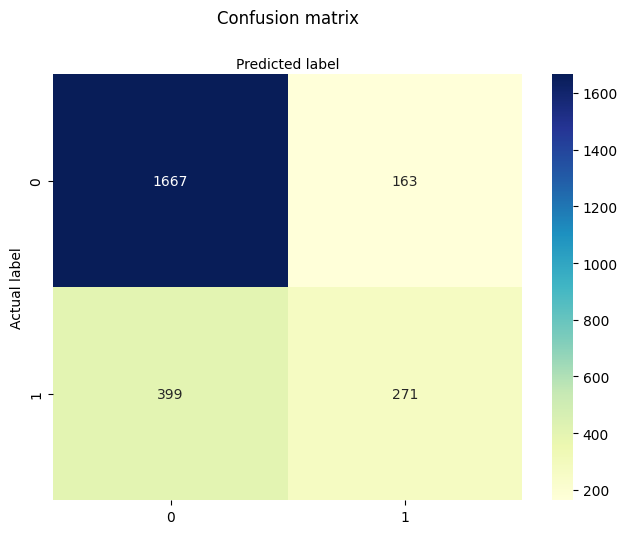

In [ ]:
class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
target_names = ['Churn Yes', 'Churn No']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Churn Yes       0.81      0.91      0.86      1830
    Churn No       0.62      0.40      0.49       670

    accuracy                           0.78      2500
   macro avg       0.72      0.66      0.67      2500
weighted avg       0.76      0.78      0.76      2500



### Reduced Model Logistic Regression Equation

In [ ]:
# Coefficients / Intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Features to list & sort
feature_coef_pairs = list(zip(selected_features, coefficients))
sorted_feature_coef_pairs = sorted(feature_coef_pairs, key=lambda x: abs(x[1]), reverse=True)

print("Coefficients:")
for feature, coef in sorted_feature_coef_pairs:
    print(f"{feature}: {coef:.4f}")

# Print the intercept
print("\nIntercept:")
print(intercept)

# Create & print the regression equation
equation = f"log(odds of Churn) = {intercept:.4f} "
for feature, coef in sorted_feature_coef_pairs:
    equation += f"+ ({coef:.4f} * {feature}) "
print("\nLogistic Regression Equation:")
print(equation)

Coefficients:
Contract_Two Year: -1.7776
StreamingMovies_Yes: 1.7677
Contract_One year: -1.6093
StreamingTV_Yes: 1.5555
Multiple_Yes: 0.8347
InternetService_None: -0.6474
InternetService_Fiber Optic: -0.6203
Techie_Yes: 0.4477
DeviceProtection_Yes: 0.3501
OnlineBackup_Yes: 0.3230

Intercept:
-2.681662985461594

Logistic Regression Equation:
log(odds of Churn) = -2.6817 + (-1.7776 * Contract_Two Year) + (1.7677 * StreamingMovies_Yes) + (-1.6093 * Contract_One year) + (1.5555 * StreamingTV_Yes) + (0.8347 * Multiple_Yes) + (-0.6474 * InternetService_None) + (-0.6203 * InternetService_Fiber Optic) + (0.4477 * Techie_Yes) + (0.3501 * DeviceProtection_Yes) + (0.3230 * OnlineBackup_Yes) 


### Statistical & Practical Significance

In [ ]:
X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()

# BIC
bic = log_reg.bic
print(f"BIC: {bic}")

Optimization terminated successfully.
         Current function value: 0.217214
         Iterations 9
BIC: 4694.278403281842


## E1: Model Comparison

The aim of both the initial and reduced model was to determine what the odds of a customer churning would be. After each model was run a confusion matrix was created along with a classification report. The initial logistic regression model contained all of the independent variables run against the dependent variable, Churn. The reduced model was created by first running Recursive Feature Elimination, RFE, to bring the number of independent attributes down to 10.

In comparing the two models we can compare the following metrics:

* Precision
  * Initial: 0.86Y/0.68N
  * Reduced: 0.81Y/0.62N
* Recall
  * Initial: 0.90Y/0.60N
  * Reduced: 0.91Y/0.40N
* F1
  * Initial: 0.88Y/0.64N
  * Reduced: 0.86Y/0.49N

The reduced model performed worse than the initial model in all instances except one where there was only a slight improvement - Recall-Reduced 0.91Y vs. Initial 0.90Y. Both models had more difficulty in predicting which customers would not churn versus which customers would Churn. The main benefit to the reduced model would be simplicity but it sacrifices a great deal of accuracy.

## E2: Calculations: Confusion Matrix / Accuracy Calculation

### Initial Logistic Model

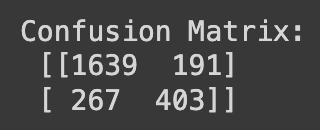

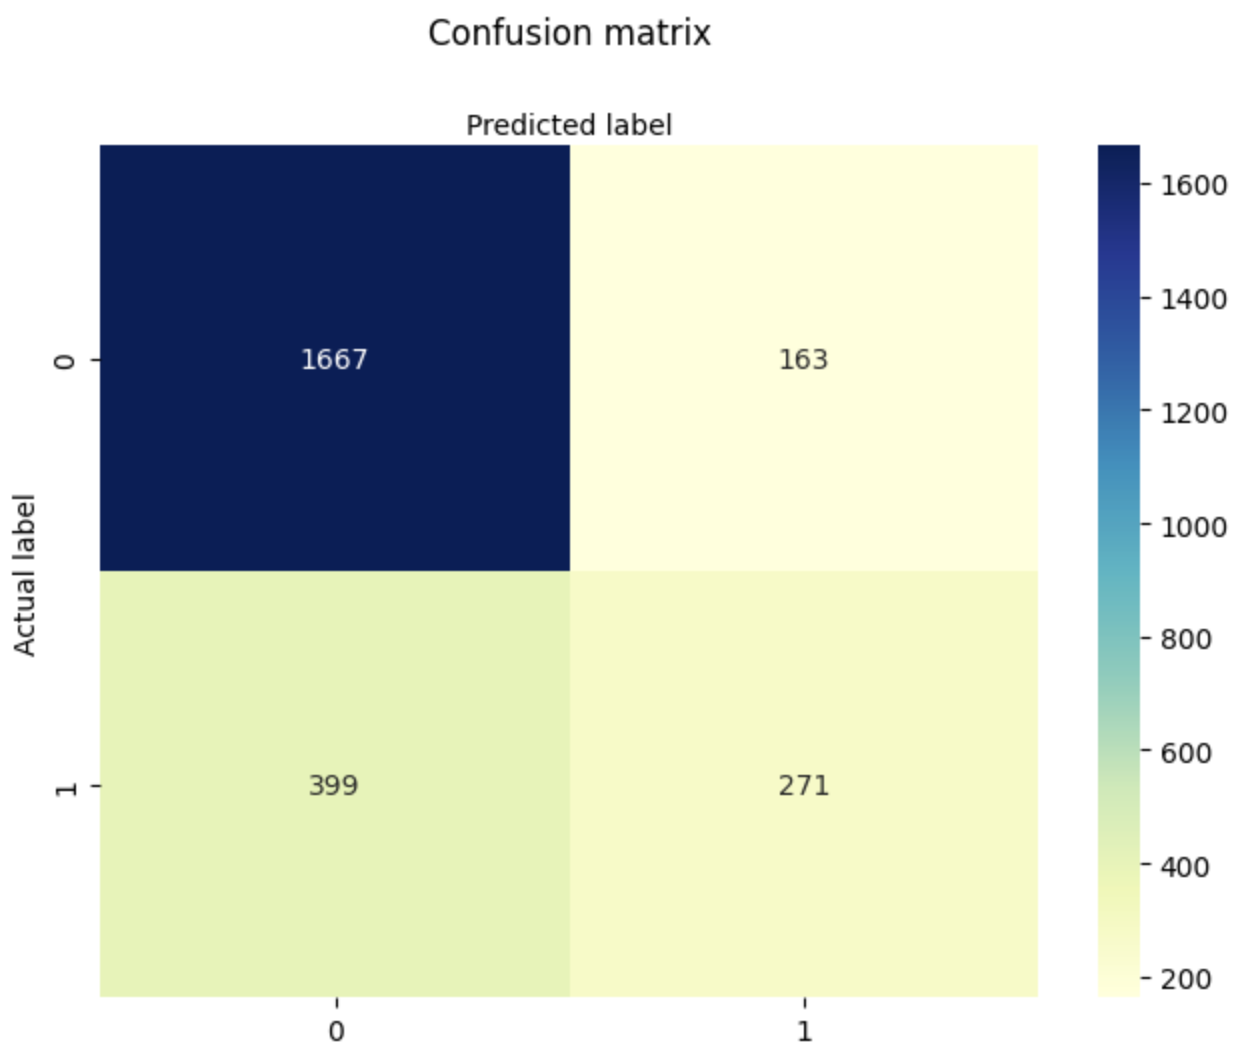

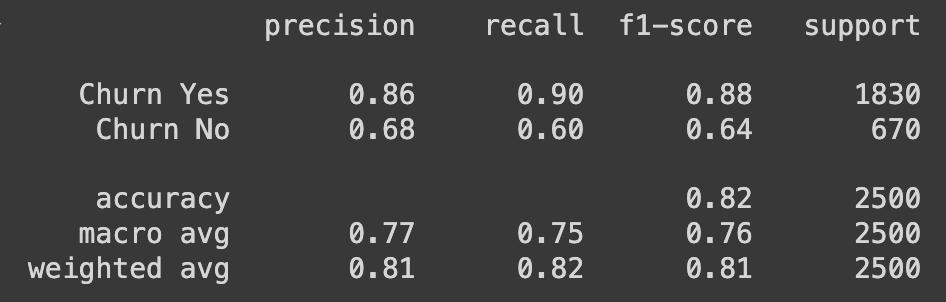

### Reduced Logistic Model

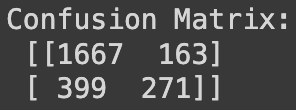

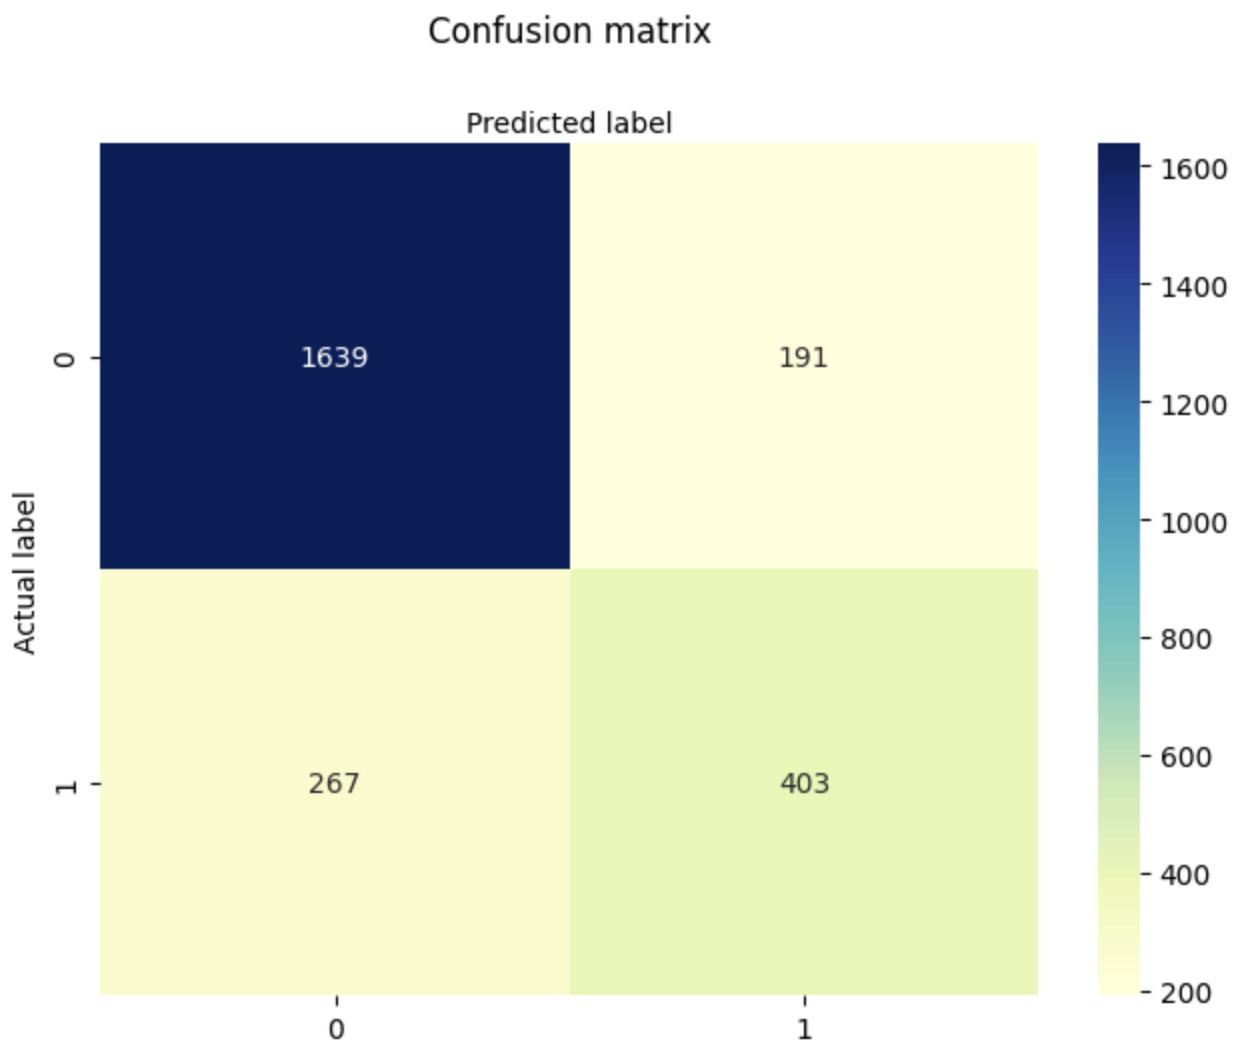

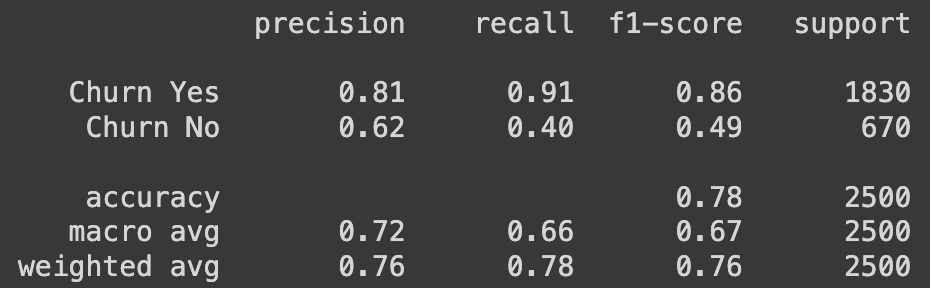

## E3: Code

# Part V: Data Summary and Implications

## F1: Summary


The **logistic regression equation** for the reduced model is:

log(odds of Churn) = -2.6817 + (-1.7776 * Contract_Two Year) + (1.7677 * StreamingMovies_Yes) + (-1.6093 * Contract_One year) + (1.5555 * StreamingTV_Yes) + (0.8347 * Multiple_Yes) + (-0.6474 * InternetService_None) + (-0.6203 * InternetService_Fiber Optic) + (0.4477 * Techie_Yes) + (0.3501 * DeviceProtection_Yes) + (0.3230 * OnlineBackup_Yes)

The equation organizes the coefficients in descending order of their absolute values, highlighting the features with the most significant impact on the odds of churn. The four largest coefficients are Contract_Two Year, StreamingMovies_Yes, Contract_One year, and StreamingTV_Yes.

* Contract_Two Year and Contract_One year have negative impacts on the logistic regression equation, indicating that customers with longer contract durations are less likely to churn compared to those with shorter-term contracts.

* StreamingMovies_Yes and StreamingTV_Yes have positive impacts on the equation, suggesting that customers who use these services are more likely to churn.

These findings provide insights into the factors influencing customer churn in the telecommunications data, emphasizing the importance of contract terms and streaming service usage patterns.


**Statistical & Practical Significance**

Bayesian Information Criterion, BIC results:

Optimization terminated successfully.
         Current function value: 0.217214
         Iterations 9
BIC: 4694.278403281842

The BIC results show that the logistic regression model successfully converged to a solution after 9 iterations. The BIC value of 4694.278 provides a metric for comparing the goodness-of-fit and complexity of this model against other machine learning models. A lower BIC value suggests a better model, making this metric useful for identifying the most suitable model for the telecommunications company's data analysis.

## F2: Reccomendations

Based on the findings from the logistic regression model, recommendations for the telecommunications company would include focusing on contract terms and strategies to attract and retain customers who heavily utilize streaming services.

# Part VI: Demonstration

## G: Panopto Video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5e0c23b0-bc2e-4e59-b54e-b19d0104123c

## H/I: Sources

* Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using R and Python. O'Reilly Media.
* DataCamp. Understanding logistic regression in Python. Retrieved June 25, 2024, from https://www.datacamp.com/tutorial/understanding-logistic-regression-python
* IBM. Confusion matrix. IBM Topics. Retrieved June 27, 2024, from https://www.ibm.com/topics/confusion-matrix
* IBM. Logistic regression. IBM Topics. Retrieved June 27, 2024, from https://www.ibm.com/topics/logistic-regression
* scikit-learn. Recursive Feature Elimination (RFE). scikit-learn Documentation. Retrieved June 27, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
* Trosset, M. (2022, January 17). Assumptions of logistic regression clearly explained. Towards Data Science. https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290